In [74]:
import pandas as pd 
data_dir = '/Users/liamzeeum/Desktop/ENVS 110/Group Project/'
excel = data_dir + 'labdatamain-8-23-2022.xlsx'
df = pd.read_excel(excel)  #reading in data
watersheds = ['Charles', 'Boston Harbor', 'Shawsheen', 'South Coastal']
nutrients = ['Total Phosphorous', 'Total Nitrogen', 'Ammonia-N', 'Nitrate/Nitrite-N']
df_nutrients = df.loc[(df['DWM_Name'].isin(nutrients))]
df_nutrients_watersheds = df_nutrients.loc[(df_nutrients['Watershed'].isin(watersheds))]
relevant_columns = ['Watershed', 'Latitude', 'Longitude', 'DWM_Name', 'StartDate', 'StartTime', 'DWM_Units', 'ResVal', 'nResult']

df_nutrients_watersheds = df_nutrients_watersheds.drop([col for col in df_nutrients_watersheds.columns if col not in relevant_columns], axis=1)


This code imports our data and labels it as df.
Then it creates two lists. The watersheds list includes the names of all the watersheds surrounding Boston. The second list includes the names of the relvant nutrients to our project. 
This code then creates a subset of the main df called df_nutrients which only includes rows with that include the relvant nutrients in their nutrient (DWM_Name) column and labels it df_nutrients.
Then it creates a subset of df_nutrients that only includes the rows that have a relvant watershed value in their Watershed column, and labels this new subset df_nutrients_watershed.
Then this code creates a list of columns that contain information relevant to our project and drops all columns from df_nutrients_watersheds that are not in that list.

In [76]:
df_nutrients_watersheds.isnull().any()

Watershed    False
Latitude     False
Longitude    False
StartDate    False
StartTime    False
DWM_Name     False
DWM_Units    False
ResVal       False
nResult       True
dtype: bool

This code tells us if there is any missing data in our data frame. This tells me that there is at least one missing data point in the nResult column.

In [79]:
df_nutrients_watersheds = df_nutrients_watersheds.loc[~df_nutrients_watersheds.isnull().any(axis=1),:].reset_index(drop=True)

This code removes any rows that have missing data and resets the row numbers to go start at 1

In [80]:
df_nutrients_watersheds.isnull().any()

Watershed    False
Latitude     False
Longitude    False
StartDate    False
StartTime    False
DWM_Name     False
DWM_Units    False
ResVal       False
nResult      False
dtype: bool

This code checks to see if the last line worked. It did!


In [97]:
df_nitrogen= df_nutrients_watersheds.loc[df_nutrients_watersheds['DWM_Name']== 'Total Nitrogen']
nitrogen_mean = df_nitrogen['nResult'].mean()
nitrogen_max = df_nitrogen['nResult'].max()
nitrogen_min = df_nitrogen['nResult'].min()
nitrogen_sd = df_nitrogen['nResult'].std()
print('nitrogen',)
print('mean:', nitrogen_mean)
print('max:', nitrogen_max)
print('min:', nitrogen_min)
print('SD:', nitrogen_sd)


nitrogen
mean: 1.09687374749499
max: 9.9
min: -0.04
SD: 1.0036534897073748


This code creates a data frame containing only the rows that measure nitrogen and then finds the summary statistics of all those nitrogen measurements. A curious thing to note is that there is a Nitrogen measurement of -.04. This is odd and deserves further attention.

In [95]:
df_ammonia= df_nutrients_watersheds.loc[df_nutrients_watersheds['DWM_Name']== 'Ammonia-N']
Ammonia_mean = df_ammonia['nResult'].mean()
Ammonia_mean

0.05562836185819067

This code allows the same to be done for Ammonia in our dataset.

In [96]:
df_nitrate_nitrite =df_nutrients_watersheds.loc[df_nutrients_watersheds['DWM_Name']== 'Nitrate/Nitrite-N']
nitrate_nitrite_mean = df_nitrate_nitrite['nResult'].mean()

nitrate_nitrite_mean

0.6230327868852459

Text(0.5, 1.0, 'Nitrogren levels Across Time')

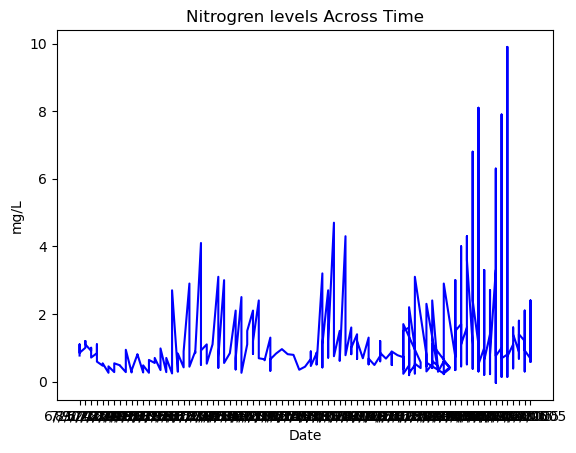

In [101]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots()
ax.plot(df_nitrogen['StartDate'], df_nitrogen['nResult'], color = 'Blue')
ax.set_xlabel('Date')
ax.set_ylabel('mg/L')
ax.set_title("Nitrogren levels Across Time")

Here is a graph that needs some work of Nitrogen measurements across our entire dataframe from earliest to latest.

In [98]:
data_dir = '/Users/liamzeeum/Desktop/ENVS 110/Group Project/'
urban_farm_data = data_dir + 'Urban_Farm_Location_Data.xlsx'
urban_farm_data_df = pd.read_excel(urban_farm_data)



This code imports the data set of Urban Farm locations in Boston compiled by us.